## **Linear Regression with Python Scikit Learn**
In this section we will see how the Python Scikit-Learn library for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.

### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### Author: Ait-Abbou Samir.
Copyright Ait-Abbou Samir., 2022

**Not for distribution.**

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [3]:
# Reading data from remote link
url="http://bit.ly/w-data"

df= pd.read_csv(url)
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Let's plot our data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data. We can create the plot with the following script:

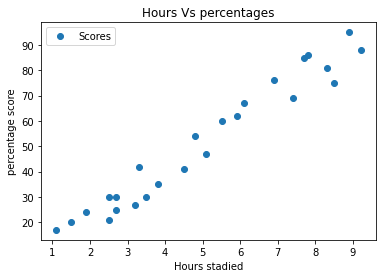

In [7]:
# Plotting the distribution of scores

df.plot(x="Hours",y="Scores",style="o")
plt.title("Hours Vs percentages")
plt.xlabel("Hours stadied")
plt.ylabel("percentage score")
plt.show()



**From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.**

### **Preparing the data**

The next step is to divide the data into "attributes" (inputs) and "labels" (outputs).

In [11]:
X = df.iloc[:, :-1].values
Y= df.iloc[:, 1].values
print(X)
print(Y)

[[2.5]
 [5.1]
 [3.2]
 [8.5]
 [3.5]
 [1.5]
 [9.2]
 [5.5]
 [8.3]
 [2.7]
 [7.7]
 [5.9]
 [4.5]
 [3.3]
 [1.1]
 [8.9]
 [2.5]
 [1.9]
 [6.1]
 [7.4]
 [2.7]
 [4.8]
 [3.8]
 [6.9]
 [7.8]]
[21 47 27 75 30 20 88 60 81 25 85 62 41 42 17 95 30 24 67 69 30 54 35 76
 86]


Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split  

X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=0)

### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [17]:
from sklearn.linear_model import LinearRegression  

regressor_model = LinearRegression()

regressor_model.fit(X_train,y_train)


LinearRegression()

<function matplotlib.pyplot.show(close=None, block=None)>

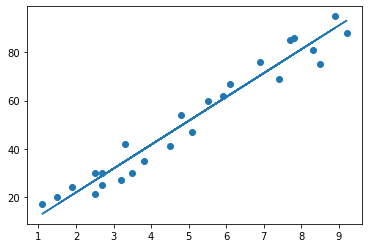

In [22]:
# Plotting the regression line

Our_Line = regressor_model.coef_*X+regressor_model.intercept_

#plotting for the test data 

plt.scatter(X,Y)
plt.plot(X,Our_Line);
plt.show

### **Making Predictions**
Now that we have trained our algorithm, it's time to make some predictions.

In [23]:
print(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [25]:
Y_pred= regressor_model.predict(X_test)# predicting the scores of our nbr of hours
Y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

#comparing Actual Vs Predicted

df2 = pd.DataFrame({'Actual':y_test, 'Predicted': Y_pred})
df2


### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [36]:
from sklearn import metrics 

print('MAE:') 
print(metrics.mean_absolute_error(y_test,Y_pred))

MAE:
4.183859899002975
